In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/sumeetsawant/Downloads/zomato-restaurants-data/zomato.csv", encoding = 'ISO-8859-1')

In [3]:
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [4]:
to_drop = ["Locality", "Address", "Locality Verbose", "Longitude", "Latitude" , "Switch to order menu"]
df.drop(to_drop, inplace = True, axis =1 )

In [5]:
df['Restaurant ID'].is_unique

True

In [6]:
df["Country Code1"]=df["Country Code"].apply(str)
df['Country Code']=df['Country Code'].replace({189:'Canada',216:'Tunisia',215:'Philadelphia',214:'Dallas',1:'India',30:'Greece',148:'Equador'})
df['Country Code']=df['Country Code'].replace([208,14,94,191,162,184,166,37],'Others')
df=df.rename(columns={"Country Code":"Country Name"})

In [7]:
df[df["Average Cost for two"]>450000]

,Restaurant ID,Restaurant Name,Country Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Code1
9283,7402935,Skye,Others,Jakarta,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,No,3,4.1,Green,Very Good,1498,94
9284,7410290,Satoo - Hotel Shangri-La,Others,Jakarta,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,No,3,4.6,Dark Green,Excellent,873,94
9287,7420899,Sushi Masa,Others,Jakarta,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,No,3,4.9,Dark Green,Excellent,605,94


In [8]:
df=df[df["Restaurant ID"] != 7402935]
df=df[df["Restaurant ID"] != 7410290]
df=df[df["Restaurant ID"] != 7420899]

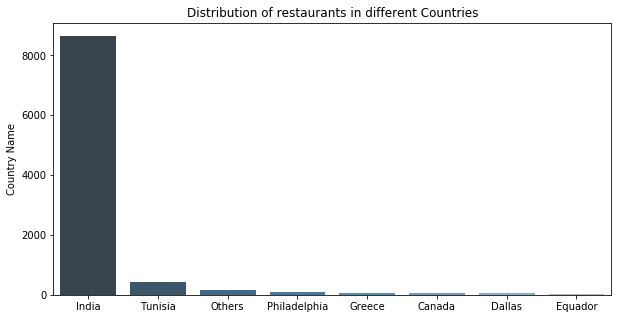

In [9]:
cnd=pd.DataFrame(df["Country Name"].value_counts())
sns.barplot(x=cnd.index,y=cnd["Country Name"],data=cnd,palette='Blues_d').set_title('Distribution of restaurants in different Countries')
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

In [48]:
df['Has Table booking'] = pd.get_dummies(df["Has Table booking"],drop_first=True)
df['Has Online delivery'] = pd.get_dummies(df["Has Online delivery"],drop_first=True)
df['Is delivering now'] = pd.get_dummies(df["Is delivering now"],drop_first=True)


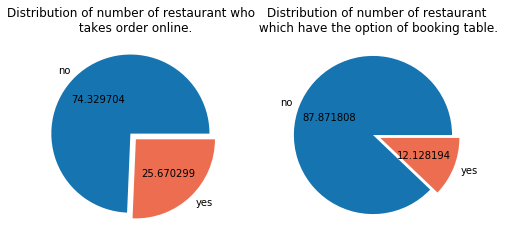

<Figure size 432x288 with 0 Axes>

In [10]:
labelyn=['no','yes']
fig = plt.gcf()
htb=df["Has Table booking"].value_counts()
htbd=pd.DataFrame(htb)
hod=df["Has Online delivery"].value_counts()
hodd=pd.DataFrame(hod)
fig.set_size_inches(8,8)
plt.subplot(2,2,2)
p1=plt.pie(htbd["Has Table booking"],labels=labelyn,colors = ['#1674b1','#ed6d50'],explode=[0.05,0.05],autopct='%2f')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Distribution of number of restaurant\n which have the option of booking table.')
plt.subplot(2,2,1)
p2=plt.pie(hodd["Has Online delivery"],labels=labelyn,colors = ['#1674b1','#ed6d50'],explode=[0.05,0.05],autopct='%2f')
fig = plt.gcf()
plt.title('Distribution of number of restaurant who \n takes order online.')
plt.figure(2)
plt.show()

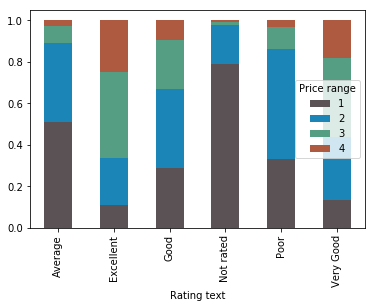

In [11]:
table=pd.crosstab(df["Rating text"],df["Price range"])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['#5a5255','#1b85b8','#559e83','#ae5a41'])
fig.set_size_inches(12,8)
plt.show()

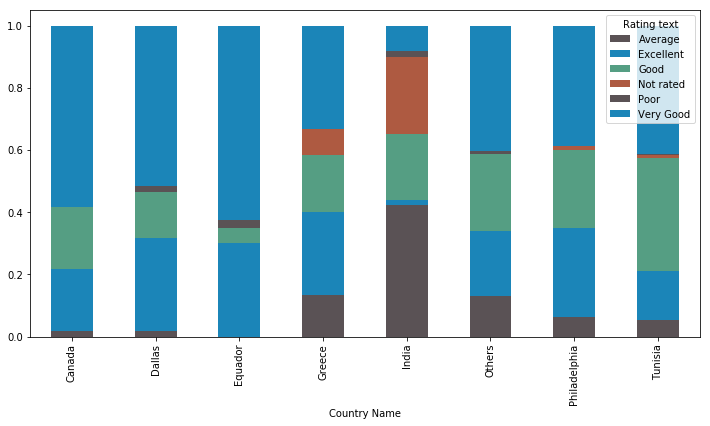

In [12]:
table=pd.crosstab(df["Country Name"],df["Rating text"])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['#5a5255','#1b85b8','#559e83','#ae5a41'])
figz = plt.gcf()
figz.set_size_inches(12,6)
plt.show()



In [14]:
df['Currency']=df['Currency'].replace({'Dollar($)':'Dollar','Pounds(��)':'Pounds','Brazilian Real(R$)':'Brazilian Real','NewZealand($)':'NewZealand Dollar'})


In [15]:
cus=df["Cuisines"].value_counts()
cuisines = {}
cnt=0
for i in cus.index:
    for j in i.split(", "):
        if j not in cuisines:
            cuisines[j]=cus[cnt]
        else:
            cuisines[j] += cus[cnt]
    cnt += 1
    
cuisines = pd.Series(cuisines).sort_values(ascending=False)

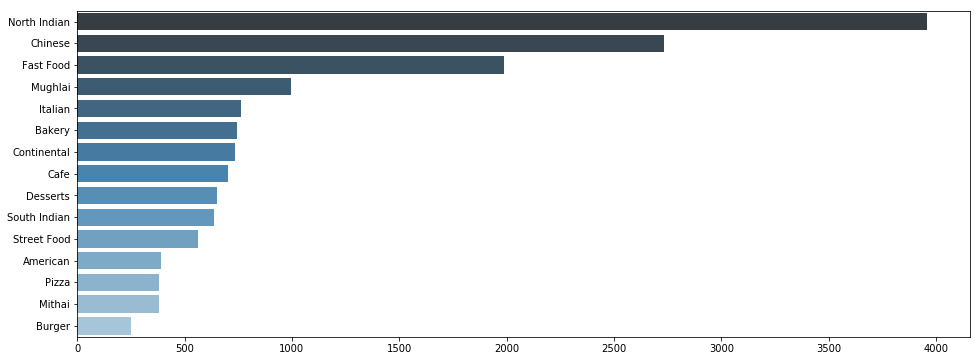

In [16]:
sns.barplot(cuisines[:15].values,cuisines[:15].index, palette="Blues_d")
fig2 = plt.gcf()
fig2.set_size_inches(16,6)
plt.show()

In [17]:
India=df[df.Currency == 'Indian Rupees(Rs.)']


In [18]:
q3_v=India["Votes"].quantile(0.75)
q1_v=India["Votes"].quantile(0.25)
iqr_v=q3_v-q1_v
lowervotes=q1_v-(iqr_v*1.5)
uppervotes=q3_v+(iqr_v*1.5)
uppervotes

244.0

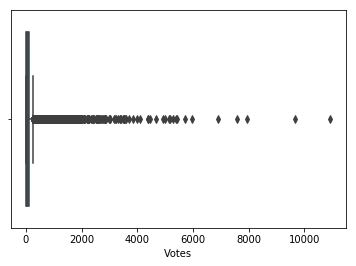

In [19]:
sns.boxplot(India["Votes"])

In [53]:
India=India[India["Votes"]<244]


In [54]:
q3_avg=India["Average Cost for two"].quantile(0.75)
q1_avg=India["Average Cost for two"].quantile(0.25)
iqr_avg=q3_avg-q1_avg
loweravg=q1_avg-(iqr_avg*1.5)
upperavg=q3_avg+(iqr_avg*1.5)
upperavg

1050.0

In [55]:
India=India[India["Average Cost for two"]<1050]


In [56]:
X=India.drop(["Restaurant ID","Restaurant Name","Rating text","Country Name","City","Rating color",
           "Cuisines","Currency","Country Code1","Aggregate rating"],axis=1)
y=India["Aggregate rating"]

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [58]:
X_train, X_test, y_train, y_test  = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
y_predict =  model.predict(X_test)

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_test, y_predict)

0.3397209241977006

In [78]:
from sklearn.tree import DecisionTreeRegressor



In [71]:
modeldt= DecisionTreeRegressor(max_depth=6)
modeldt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [72]:
y_predictdt=modeldt.predict(X_test)
r2_score(y_test,y_predictdt)

0.9593869523320646

In [73]:
from sklearn.ensemble import GradientBoostingRegressor


In [74]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
      max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)


In [76]:
y_predictdt=est.predict(X_test)
r2_score(y_test,y_predictdt)

0.9583564984188241

In [81]:
import xgboost as xgb


In [82]:
xgb_clf = xgb.XGBRegressor(max_depth=3, n_estimators=5000, learning_rate=0.2,
                            n_jobs=-1)

In [83]:
xgb_clf.fit(X_train, y_train)



/Users/sumeetsawant/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=5000, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [85]:
y_pred = xgb_clf.predict(X_test)

In [86]:
r2_score(y_test, y_pred) 

0.9423166027462261